In [2]:
import pandas as pd

bus_data = pd.read_csv("Monthly_Updating_Bus_Stop_Usage.csv")
busstops = bus_data['stop_name'].unique()
print("Unique Bus Stops:", busstops)

print("\nNumber of Bus Stops:", len(busstops))

Unique Bus Stops: ['5TH ST AT CAVIT AVE' '7TH ST AT PROSPECT AVE' 'FOREST AVE AT 6TH ST' ...
 'WESTINGHOUSE AVE AT COMMERCE ST' 'WESTINGHOUSE AVE AT HERMAN AVE'
 'HERMAN AVE AT COMMERCE ST']

Number of Bus Stops: 6218


In [4]:
filtered_data = bus_data[(bus_data['datekey'] <= 202104) & (bus_data['datekey'] > 202004)]

print("Unique Bus Stops (from 2020-2021):", (filtered_data['stop_name'].unique()))

print("\nNumber of Bus Stops (from 2020-2021):", len(filtered_data['stop_name'].unique()))

Unique Bus Stops (from 2020-2021): ['5TH ST AT CAVIT AVE' '7TH ST AT PROSPECT AVE' 'FOREST AVE AT 6TH ST' ...
 'WESTINGHOUSE AVE AT COMMERCE ST' 'WESTINGHOUSE AVE AT HERMAN AVE'
 'HERMAN AVE AT COMMERCE ST']

Number of Bus Stops (from 2020-2021): 6218


In [6]:
crosswalk_data = pd.read_csv("City of Pittsburgh Crosswalks.csv")

neighborhoods = crosswalk_data['neighborhood'].unique()
print("Neighborhoods:", list(neighborhoods))

print("\nNumber of Neighborhoods:", len(neighborhoods))

Neighborhoods: ['Central Business District', 'Strip District', 'Morningside', 'Squirrel Hill North', 'Squirrel Hill South', 'Shadyside', 'Polish Hill', 'North Oakland', 'West Oakland', 'Central Oakland', 'East Liberty', 'Bloomfield', 'South Oakland', 'Stanton Heights', 'Terrace Village', 'Highland Park', 'Bluff', 'Lincoln-Lemington-Belmar', 'Lincoln Place', 'Lower Lawrenceville', 'Crawford-Roberts', 'Middle Hill', 'Bedford Dwellings', 'Upper Hill', 'Point Breeze', 'Larimer', 'Point Breeze North', 'Homewood West', 'Homewood North', 'Homewood South', 'East Hills', nan, 'Friendship', 'Regent Square', 'South Side Flats', 'South Shore', 'Swisshelm Park', 'Greenfield', 'Hazelwood', 'Glen Hazel', 'Elliott', 'Hays', 'Esplen', 'New Homestead', 'Central Lawrenceville', 'West End', 'Troy Hill', 'East Allegheny', 'Spring Garden', 'North Shore', 'Spring Hill-City View', 'Summer Hill', 'Northview Heights', 'Perry North', 'Allegheny Center', 'Central Northside', 'Garfield', 'Chateau', 'Manchester', '

<Axes: >

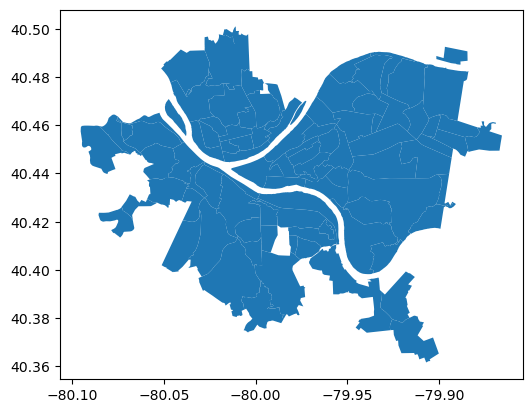

In [17]:
import geopandas as gpd
neighborhoods = gpd.read_file("Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

<Axes: >

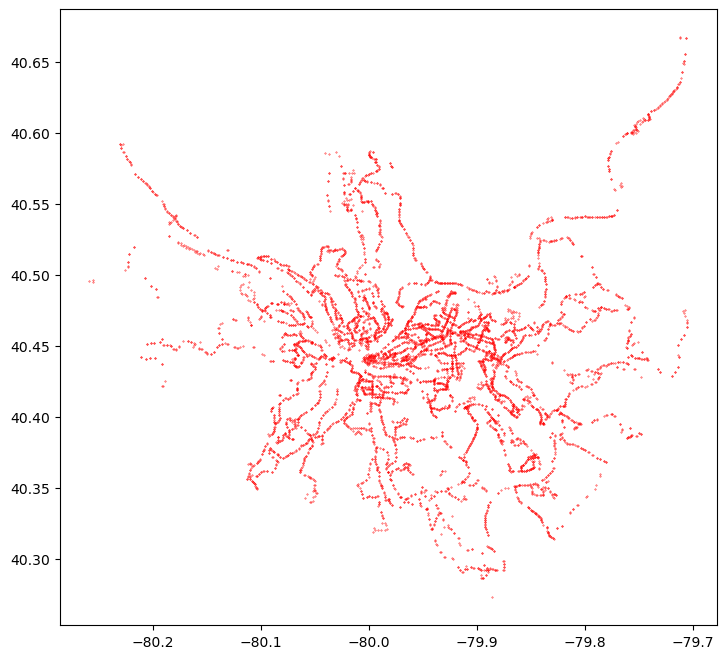

In [19]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(bus_data['longitude'], bus_data['latitude'])]
gdf = gpd.GeoDataFrame(bus_data, geometry=geometry)
gdf.set_crs("EPSG:4326", inplace=True)
gdf = gdf.drop_duplicates(subset="geometry")
gdf.plot(figsize=(10, 8), color="red", markersize=0.1)


<Axes: >

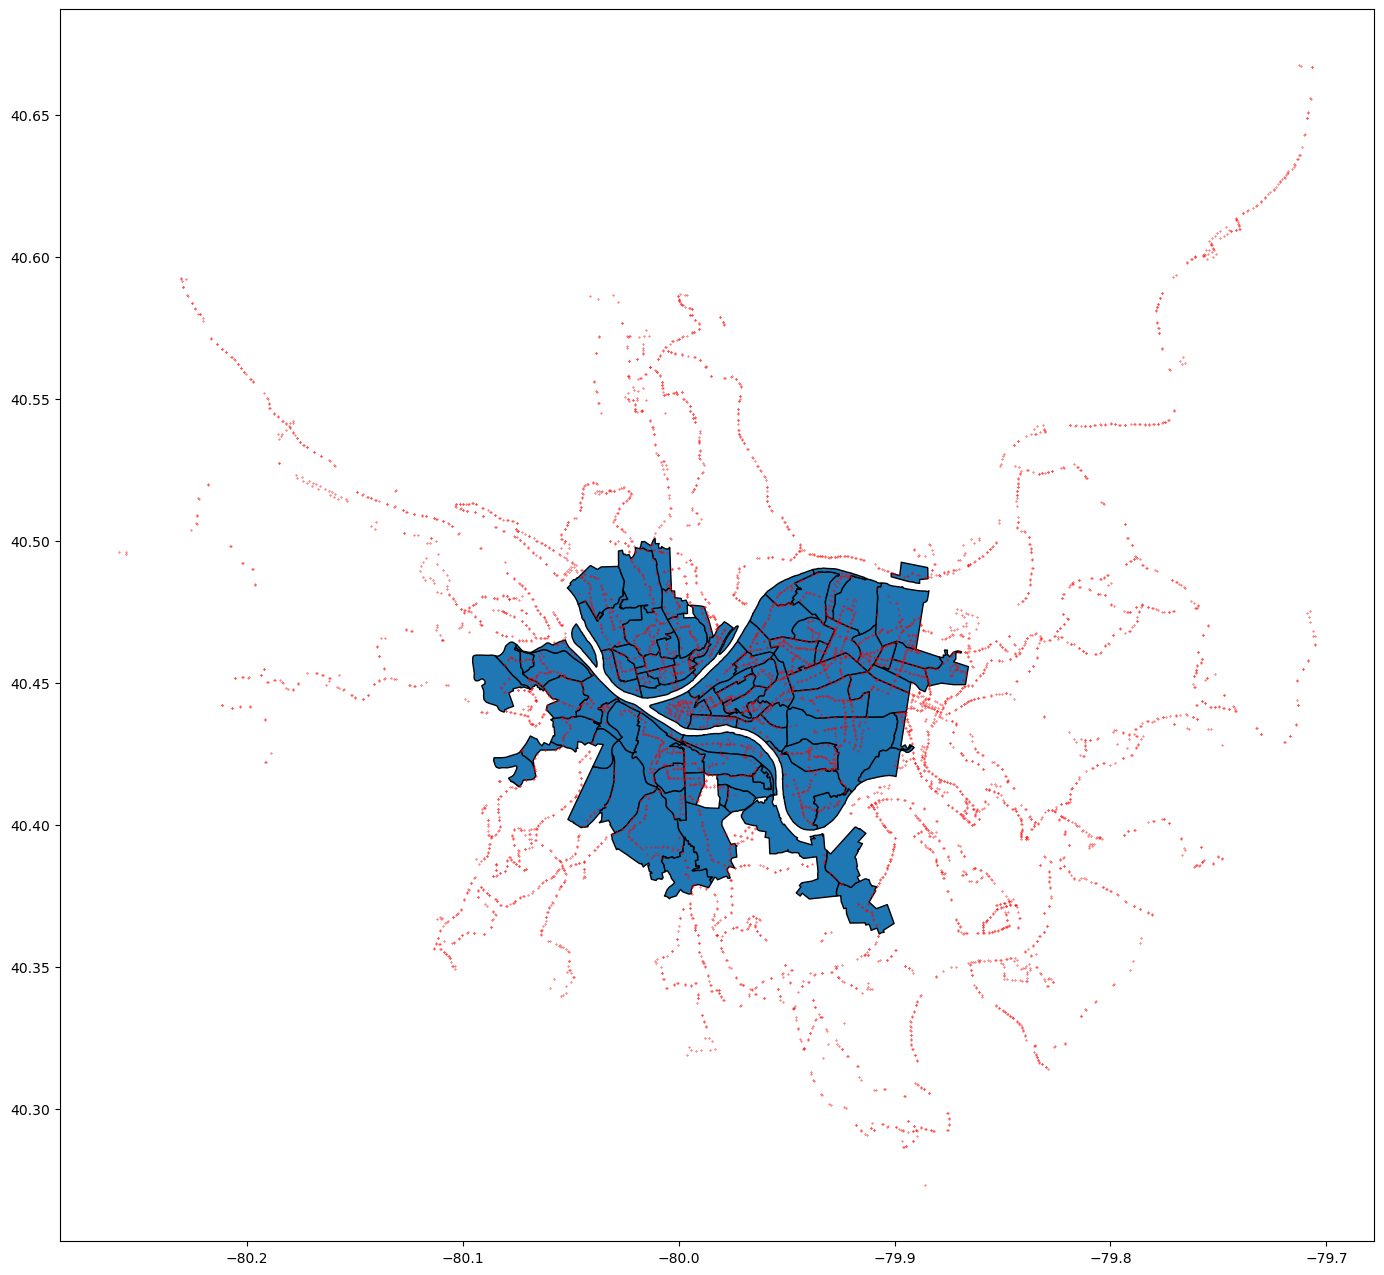

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,16))

neighborhoods.plot(ax=ax,edgecolor='black')
gdf.plot(ax=ax, color="red", markersize=0.1)

In [23]:
points_in_regions = gpd.sjoin(gdf, neighborhoods, how="inner", predicate="within")

counts = points_in_regions.groupby("hood").size().reset_index(name="point_count")
print(counts.sort_values(by="point_count", ascending=False).head(60))

                         hood  point_count
16  Central Business District           93
9                  Bloomfield           90
46   Lincoln-Lemington-Belmar           90
52           Mount Washington           89
67                  Shadyside           86
76        Squirrel Hill South           82
36                 Greenfield           77
75        Squirrel Hill North           77
61                Perry South           71
13                  Brookline           69
38                  Hazelwood           68
28               East Liberty           65
44                    Larimer           56
12           Brighton Heights           53
55              North Oakland           46
41             Homewood South           45
71           South Side Flats           45
27                 East Hills           44
49         Marshall-Shadeland           43
68                   Sheraden           42
15                    Carrick           42
62               Point Breeze           40
72         

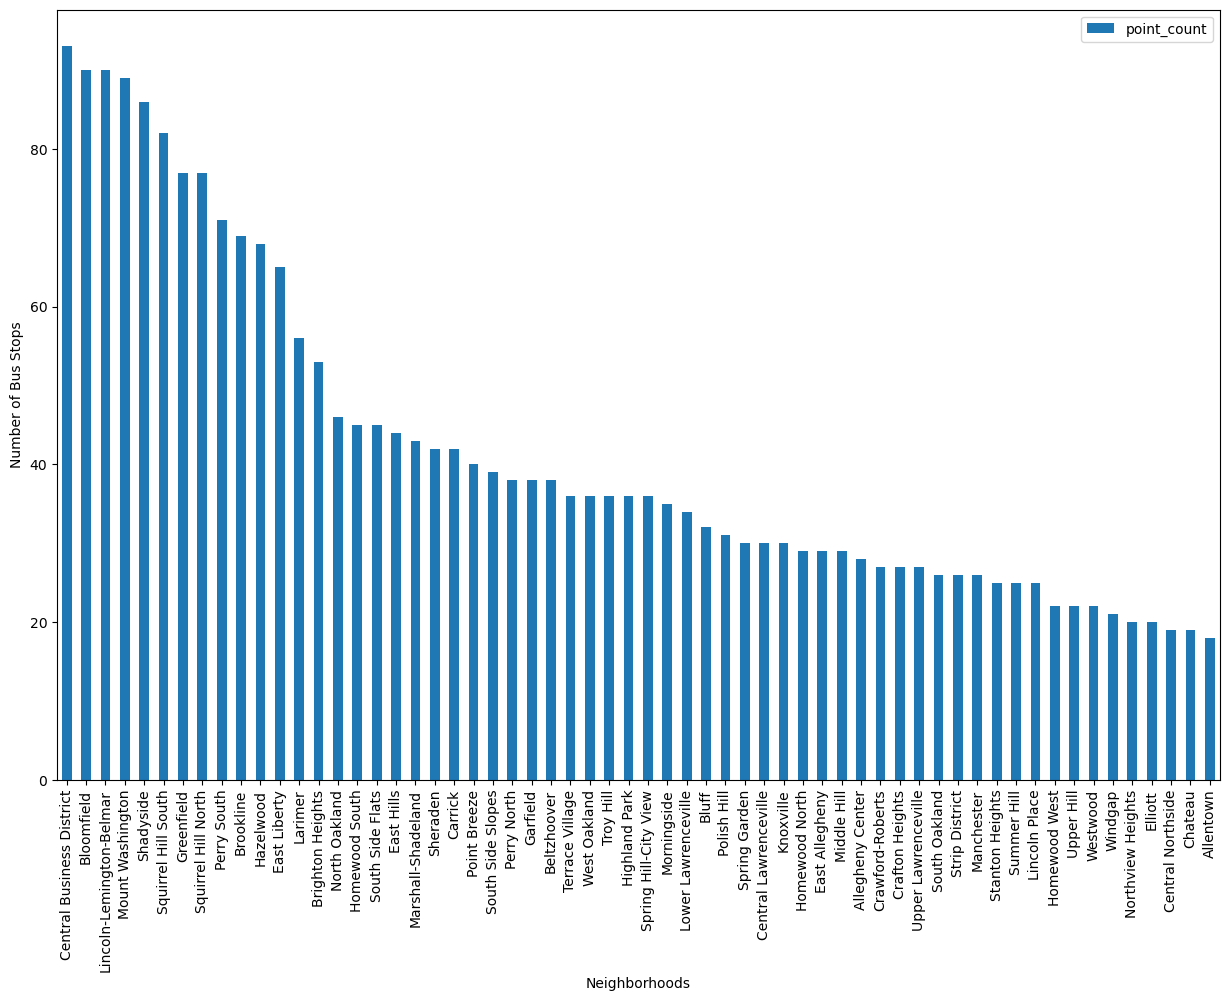

In [25]:
counts.sort_values(by="point_count", ascending=False).head(60).plot.bar(x="hood", y="point_count",figsize=(15,10))
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Bus Stops")

plt.xticks(rotation=90)

plt.show()

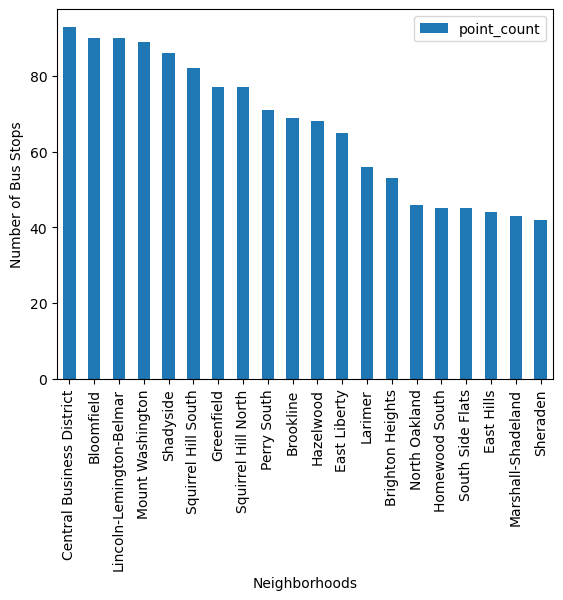

In [27]:
counts.sort_values(by="point_count", ascending=False).head(20).plot.bar(x="hood", y="point_count")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Bus Stops")

plt.xticks(rotation=90)

plt.show()